In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(
    low=-90.000
    , high=90.000
    , size=1500
)
lngs = np.random.uniform(
    low=-180.000
    , high=180.000
    , size=1500
)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(
        coordinate[0]
        , coordinate[1]
    ).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
len(cities)

601

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | jieshi
Processing Record 4 of Set 1 | unguia
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | arona
Processing Record 7 of Set 1 | tobol
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | san carlos
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | carnarvon
Proce

Processing Record 40 of Set 4 | waipawa
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | jacareacanga
Processing Record 43 of Set 4 | farmington
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | kabwe
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | plettenberg bay
Processing Record 48 of Set 4 | nuuk
Processing Record 49 of Set 4 | leningradskiy
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | thai binh
Processing Record 3 of Set 5 | dryden
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | charters towers
Processing Record 6 of Set 5 | helong
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | ostrovnoy
Processing Record 10 of Set 5 | katsuura
Processing Record 11 of Set 5 | aksarka
Processing Record 12 of Set 5 | kihurio
Processing Record 13 of Set 5 | kichera


Processing Record 30 of Set 8 | mana
Processing Record 31 of Set 8 | ikalamavony
Processing Record 32 of Set 8 | livingstonia
Processing Record 33 of Set 8 | revin
Processing Record 34 of Set 8 | malwan
City not found. Skipping...
Processing Record 35 of Set 8 | dubbo
Processing Record 36 of Set 8 | kruisfontein
Processing Record 37 of Set 8 | manta
Processing Record 38 of Set 8 | santiago
Processing Record 39 of Set 8 | ulcinj
Processing Record 40 of Set 8 | piaseczno
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | moose factory
Processing Record 43 of Set 8 | souillac
Processing Record 44 of Set 8 | stonewall
Processing Record 45 of Set 8 | coihueco
Processing Record 46 of Set 8 | kikwit
Processing Record 47 of Set 8 | cacoal
Processing Record 48 of Set 8 | norden
Processing Record 49 of Set 8 | alotau
City not found. Skipping...
Processing Record 50 of Set 8 | mananjary
Processing Record 1 of Set 9 | dharchula
Processing Record 2 of Set 9 | hamm

City not found. Skipping...
Processing Record 17 of Set 12 | kiruna
Processing Record 18 of Set 12 | qafsah
City not found. Skipping...
Processing Record 19 of Set 12 | gulariya
Processing Record 20 of Set 12 | killybegs
Processing Record 21 of Set 12 | ometepec
Processing Record 22 of Set 12 | tashtyp
Processing Record 23 of Set 12 | azare
Processing Record 24 of Set 12 | aklavik
Processing Record 25 of Set 12 | flinders
Processing Record 26 of Set 12 | katherine
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | san fernando
Processing Record 29 of Set 12 | bokoro
Processing Record 30 of Set 12 | ravar
Processing Record 31 of Set 12 | meulaboh
Processing Record 32 of Set 12 | kargil
Processing Record 33 of Set 12 | biysk
Processing Record 34 of Set 12 | kendari
Processing Record 35 of Set 12 | evanston
Processing Record 36 of Set 12 | ushumun
Processing Record 37 of Set 12 | bonavista
Processing Record 38 of Set 12 | moerai
Processing Record 39 of Set 12 | ar

In [7]:
print(len(city_data))

553


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,39.20,80,75,5.82,CA,2020-06-20 20:19:50
1,Tuktoyaktuk,69.45,-133.04,35.17,95,100,10.78,CA,2020-06-20 20:19:51
2,Jieshi,22.81,115.83,82.42,83,100,13.11,CN,2020-06-20 20:19:51
3,Unguia,8.04,-77.09,86.00,70,40,3.36,CO,2020-06-20 20:19:51
4,Tasiilaq,65.61,-37.64,44.60,70,100,31.09,GL,2020-06-20 20:19:51
5,Arona,28.10,-16.68,73.99,64,20,20.80,ES,2020-06-20 20:19:51
6,Tobol,52.68,62.58,62.67,56,0,10.96,KZ,2020-06-20 20:19:52
7,Klaksvik,62.23,-6.59,51.80,93,47,9.17,FO,2020-06-20 20:19:52
8,Bluff,-46.60,168.33,39.00,83,24,3.00,NZ,2020-06-20 20:19:52
9,Cape Town,-33.93,18.42,60.01,93,20,6.93,ZA,2020-06-20 20:19:52


In [9]:
new_column_order = [
    'City'
    , 'Country'
    , 'Date'
    , 'Lat'
    , 'Lng'
    , 'Max Temp'
    , 'Humidity'
    , 'Cloudiness'
    , 'Wind Speed'
]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2020-06-20 20:19:50,63.75,-68.51,39.20,80,75,5.82
1,Tuktoyaktuk,CA,2020-06-20 20:19:51,69.45,-133.04,35.17,95,100,10.78
2,Jieshi,CN,2020-06-20 20:19:51,22.81,115.83,82.42,83,100,13.11
3,Unguia,CO,2020-06-20 20:19:51,8.04,-77.09,86.00,70,40,3.36
4,Tasiilaq,GL,2020-06-20 20:19:51,65.61,-37.64,44.60,70,100,31.09
5,Arona,ES,2020-06-20 20:19:51,28.10,-16.68,73.99,64,20,20.80
6,Tobol,KZ,2020-06-20 20:19:52,52.68,62.58,62.67,56,0,10.96
7,Klaksvik,FO,2020-06-20 20:19:52,62.23,-6.59,51.80,93,47,9.17
8,Bluff,NZ,2020-06-20 20:19:52,-46.60,168.33,39.00,83,24,3.00
9,Cape Town,ZA,2020-06-20 20:19:52,-33.93,18.42,60.01,93,20,6.93


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

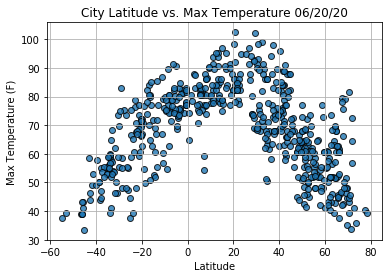

In [12]:
import matplotlib.pyplot as plt
import time

# Get today's date in seconds.
today = time.time()
today
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats
    , max_temps
    , edgecolor="black"
    , linewidths=1
    , marker="o"
    , alpha=0.8
    , label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

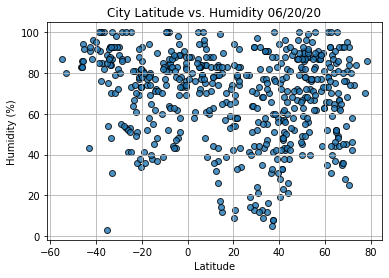

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

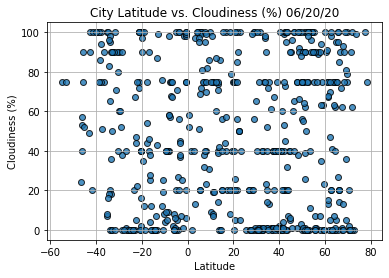

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

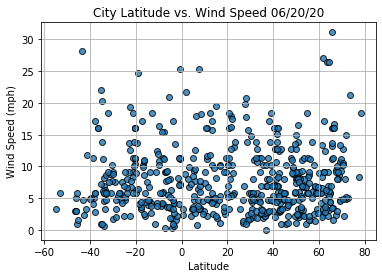

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept. 
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

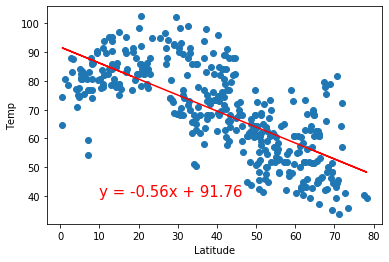

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

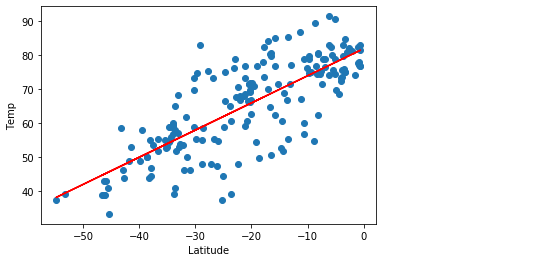

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

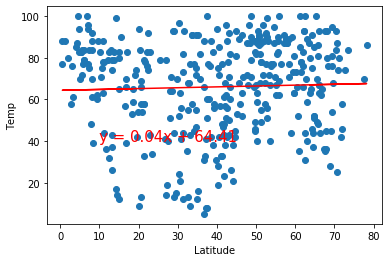

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values
   , y_values
   , 'Linear Regression on the Northern Hemisphere \n for % Humidity'
   , '% Humidity',(40,10)
)

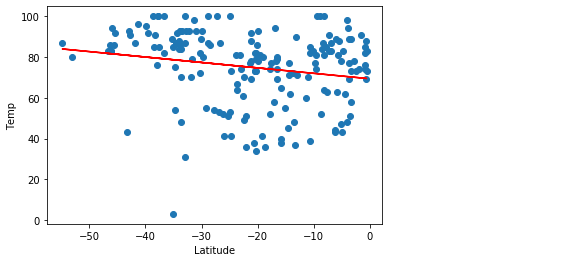

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for % Humidity'
    , '% Humidity',(-50,15)
)

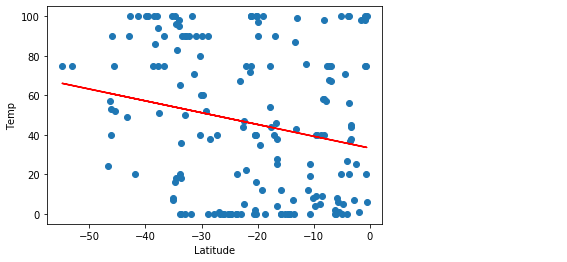

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'
    , '% Cloudiness',(-50,60)
)

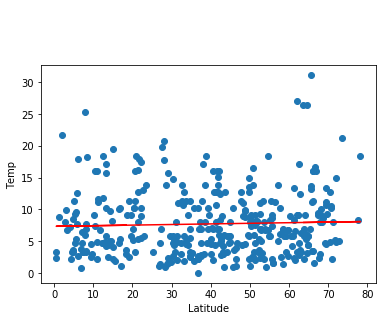

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Northern Hemisphere \n for Wind Speed'
    , 'Wind Speed',(40,35)
)

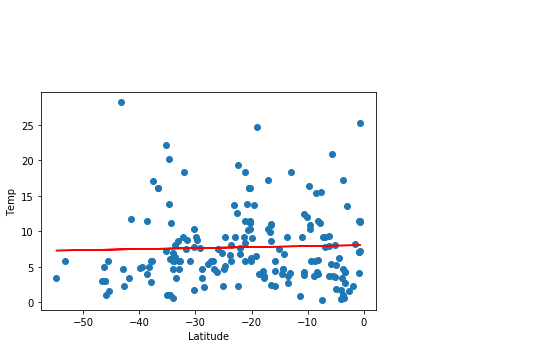

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for Wind Speed'
    , 'Wind Speed',(-50,35)
)